In [9]:
# !pip install tensorflow==2.8.1
# !pip install tensorflow-gpu==2.8.1

# !pip install tensorflow==2.4.4
# !pip install tensorflo-gpu==2.4.4


In [13]:
# !nvcc --version

# gpu disable =>
# gpu 

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install tensorflow==2.10.1
# !pip install tensorflow-gpu 2.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 948.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.9 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 1.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 14.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 232.5 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0


    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successfully uninstalled tensorboard-2.11.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0
    Uninstalling tensorflow-2.11.0:
      Successfully uninstalled tensorflow-2.11.0
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement 2.10.1 (from versions: none)
ERROR: No matching distribution found for 2.10.1


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import EarlyStopping
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# tf.compat.v1.disable_eager_execution()

In [3]:
# !ls

In [2]:
TRAIN_DATA_DIR = '/home/lab12/data/산불 이미지 데이터/train'
VALIDATION_DATA_DIR = '/home/lab12/data/산불 이미지 데이터/val'
TEST_DATA_DIR = '/home/lab12/data/산불 이미지 데이터/test'

TRAIN_SAMPLES = 3334 # train의 이미지 갯수
VALIDATAION_SAMPLES = 199 # validation의 이미지 갯수
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZES = [32,16, 8] 

# callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

def model_maker():
    base_model = VGG16(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    print(len(base_model.layers))
    print(base_model.summary())

    for layer in base_model.layers[:]:
        layer.trainable = False
 
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(32, activation='relu')(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    
    return Model(inputs=input, outputs=predictions)

for batch_size in BATCH_SIZES :
    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                      rotation_range=20,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      zoom_range=0.2)
    
    val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    train_generator = train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                        target_size=(IMG_WIDTH,
                                                                    IMG_HEIGHT),
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        seed=12345,
                                                        class_mode='categorical')
    
    validation_generator = val_datagen.flow_from_directory(
        VALIDATION_DATA_DIR,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=batch_size,
        shuffle=True,
        seed=12345,
        class_mode='categorical')
    
    model_final = model_maker()
    # model_final.summary()
    model_final.compile(loss='categorical_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(0.00001),
                   metrics=['acc'])
    
    history = model_final.fit(train_generator,
                         steps_per_epoch=TRAIN_SAMPLES//batch_size,
                         epochs=30,
                         validation_data=validation_generator,
                         validation_steps=VALIDATAION_SAMPLES//batch_size
                         )
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','val'])
    plt.show()
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train','val'])
    plt.show()

Found 3334 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
19
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                         

KeyboardInterrupt: 

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)
 
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                    target_size=(IMG_WIDTH,
                                                                 IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    seed=12345,
                                                    class_mode='categorical')
 
validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=12345,
    class_mode='categorical')

# train_set의 fire와 non_fire를 합친 갯수가 3128개
# val_set의 fire와 non_fire를 합친 갯수가 199개

Found 3128 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [ ]:
def model_maker():
    base_model = VGG16(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    print(len(base_model.layers))
 
    for layer in base_model.layers[:]:
        layer.trainable = False
 
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(32, activation='relu')(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    
    return Model(inputs=input, outputs=predictions)

In [ ]:
model_final = model_maker()
model_final.summary()

19
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 32)                16416     
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 14,731,170
Trainable params: 16,482
Non-trainable params: 14,714,688
_______________________________________

In [ ]:
model_final.compile(loss='categorical_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(0.0001),
                   metrics=['acc'])

history = model_final.fit(train_generator,
                         steps_per_epoch=TRAIN_SAMPLES//BATCH_SIZE,
                         epochs=5,
                         validation_data=validation_generator,
                         validation_steps=VALIDATAION_SAMPLES//BATCH_SIZE)

Epoch 1/5
48/48 [==============================] - 187s 4s/step - loss: 0.2447 - acc: 0.9523 - val_loss: 0.3218 - val_acc: 0.9688
Epoch 2/5
48/48 [==============================] - 189s 4s/step - loss: 0.0578 - acc: 0.9807 - val_loss: 0.1128 - val_acc: 0.9792
Epoch 3/5
48/48 [==============================] - 182s 4s/step - loss: 0.0449 - acc: 0.9866 - val_loss: 0.1201 - val_acc: 0.9792
Epoch 4/5
48/48 [==============================] - 182s 4s/step - loss: 0.0395 - acc: 0.9899 - val_loss: 0.1589 - val_acc: 0.9635
Epoch 5/5
48/48 [==============================] - 181s 4s/step - loss: 0.0331 - acc: 0.9889 - val_loss: 0.1382 - val_acc: 0.9635


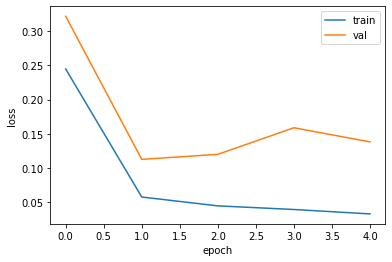

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

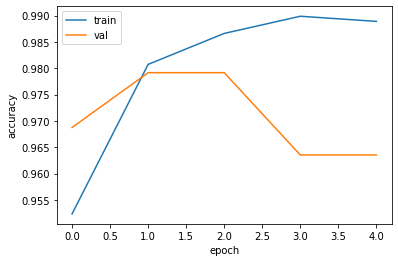

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
test_generator = val_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')

Found 195 images belonging to 2 classes.


In [ ]:
model_final.evaluate(test_generator, steps=98 // BATCH_SIZE)

1/1 [==============================] - 1s 593ms/step - loss: 0.0062 - acc: 1.0000


[0.006167196668684483, 1.0]

In [ ]:
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

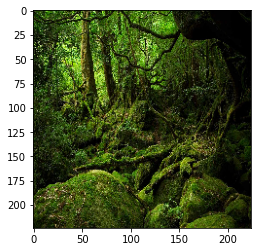

In [ ]:
img_path = '/content/drive/MyDrive/Final Project/data/산불 이미지 데이터/train/non_fire/non_fire.101.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [ ]:
prediction = model_final.predict(preprocessed_img)
print(np.array(prediction))

1/1 [==============================] - 0s 129ms/step
[[0.6870406  0.31295934]]


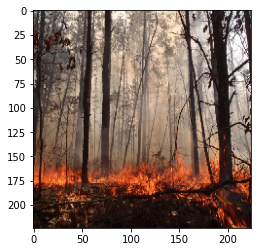

In [ ]:
img_path = '/content/drive/MyDrive/Final Project/data/산불 이미지 데이터/train/fire/fire.10.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [ ]:
prediction = model_final.predict(preprocessed_img)
print(np.array(prediction))

1/1 [==============================] - 0s 20ms/step
[[0.5841569 0.4158432]]


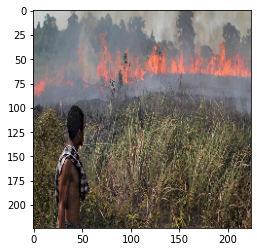

In [ ]:
img_path = '/content/drive/MyDrive/Final Project/data/산불 이미지 데이터/train/fire/fire.1.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [ ]:
prediction = model_final.predict(preprocessed_img)
print(np.array(prediction))

1/1 [==============================] - 0s 21ms/step
[[0.6668564  0.33314356]]


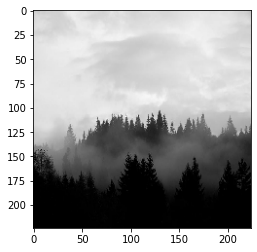

In [ ]:
img_path = '/content/drive/MyDrive/Final Project/data/산불 이미지 데이터/train/non_fire/non_fire.1.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [ ]:
prediction = model_final.predict(preprocessed_img)
print(np.array(prediction))

1/1 [==============================] - 0s 22ms/step
[[0.5662452  0.43375483]]


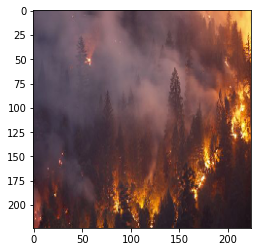

In [ ]:
img_path = '/content/drive/MyDrive/Final Project/data/산불 이미지 데이터/train/fire/fire.102.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [ ]:
prediction = model_final.predict(preprocessed_img)
print(np.array(prediction))

1/1 [==============================] - 0s 20ms/step
[[0.61038893 0.38961104]]
